In [71]:
##importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import random
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [82]:
#randomnly choosing 24 input vectors with the colors asked to be chosen
X=[(255,0,0),(102,0,102),(255,102,102),(0,128,55),(153,0,76),(255,0,127),(240,1,40),(0,255,0),(51,102,0),
   (102,0,102),(128,255,204),(102,178,225),(255,127,0),(128,0,0),(0,0,255),(255,128,255),(0,128,0),(128,204,255),
   (0,153,153),(153,255,0),(102,102,0),(255,255,0),(0,255,255),(255,0,255)]

In [83]:
#normalization of input vector to lie between 0 to 1
X=np.asarray(X)
X=X/255

In [84]:
#initializing the weights randomnly to the weight matrix
weights = np.random.random((100, 100, 3))
weights_initial=weights.copy()

In [85]:
class som():
    #initialization of global members
    def __init__(self,x,weights,lr,sigma):
        self.x=x
        self.weights=weights
        self.lr=lr
        self.sigma=sigma
    #defining the decay learning rate with respect to time
    def decayLearningRate(self,k):
        return self.lr * np.exp(-k/1000)
    #defining the decay radius with respect to time
    def decayRadius(self,k):
        return self.sigma * np.exp(-k/1000)
    #the neighbourhood of the winning neuron
    def neighbourhood(self,d,sigma):
        return np.exp(-(d / (2* (sigma**2))))
    #computing the winning index 
    def winning_neuron(self,x):
        distance=np.linalg.norm(self.weights - x,axis=2)**2
        minimal_distance=np.amin(distance)
        winning_index=np.where(distance==minimal_distance)
        return winning_index   
    #updating the neighbourhood of the winning neuron
    def update_weights(self,x,index,lr,sigma):
        w=np.indices((100,100))
        w[0]=w[0]-index[0]
        w[1]=w[1]-index[1]
        neighbour_xy=self.neighbourhood(np.linalg.norm(w,axis=0)**2,sigma)
        neighbour_xy = np.dstack([neighbour_xy]*3)
        self.weights=self.weights+(lr*neighbour_xy*(x-self.weights))
        return self.weights
    #trainning the model for different values of sigma for 1000 epochs and showing the subplots at specific iterations
    def train(self):
        fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
        count = 0
        for i in range(1000):
            lr=model.decayLearningRate(i)
            sigma=model.decayRadius(i)
            for j in range(24):
                winning_index=model.winning_neuron(X[j])
                updated_weights=model.update_weights(X[j],winning_index,lr,sigma)
            epoch_list = np.array([20, 40, 100, 1000])
            if i+1 in epoch_list:
                plt.sca(axs[count])
                plt.title("Epoch "+str(i+1) + " & Sigma "+ str(p))
                plt.imshow(updated_weights)
                count = count + 1
        plt.show()
        return

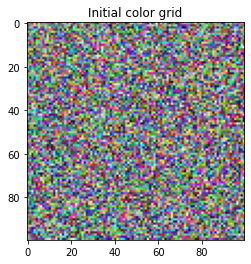

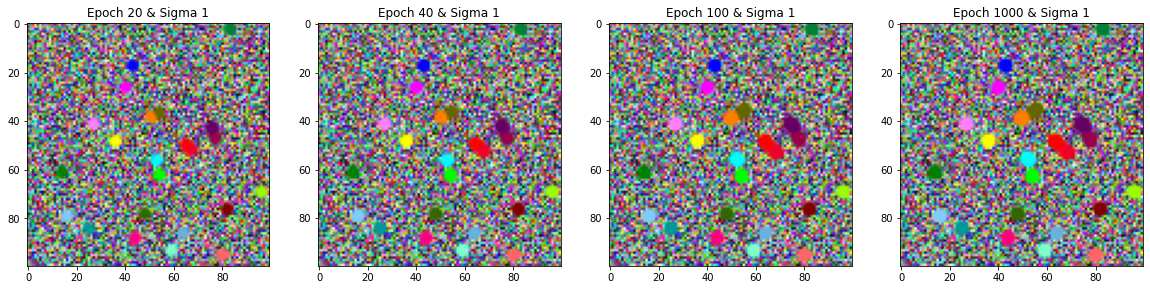

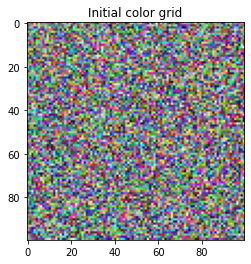

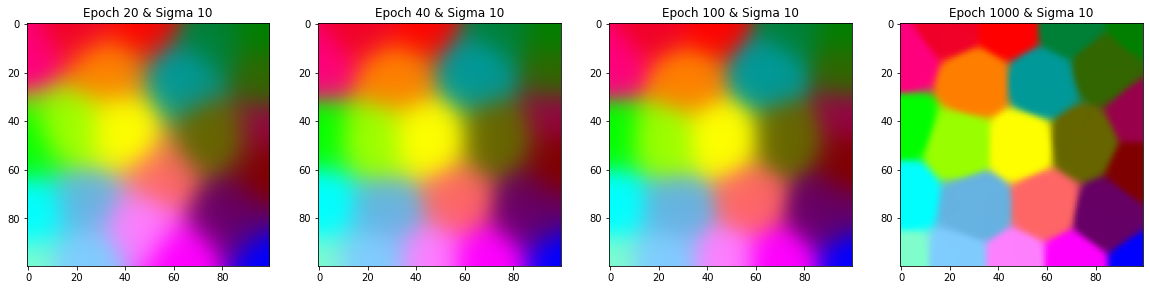

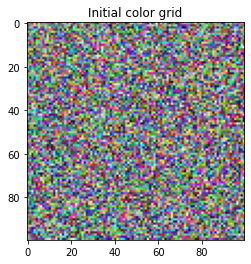

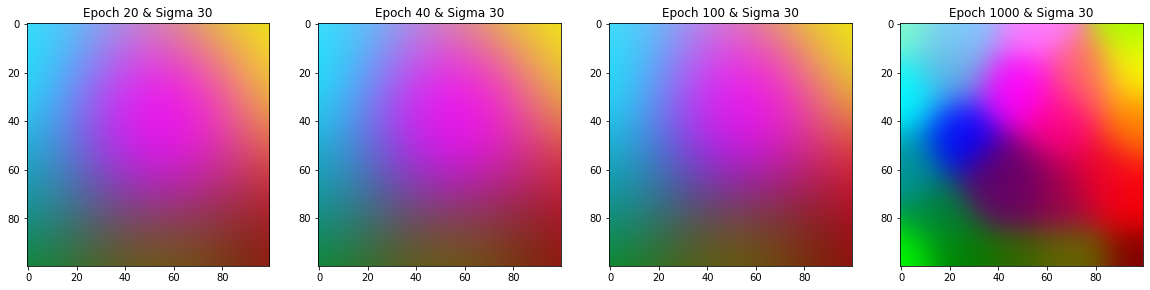

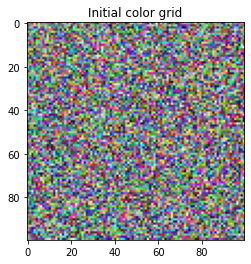

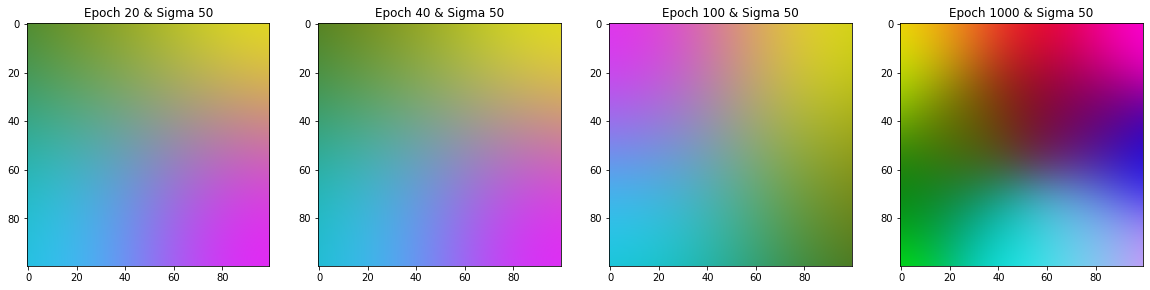

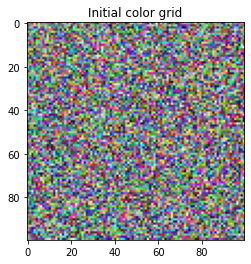

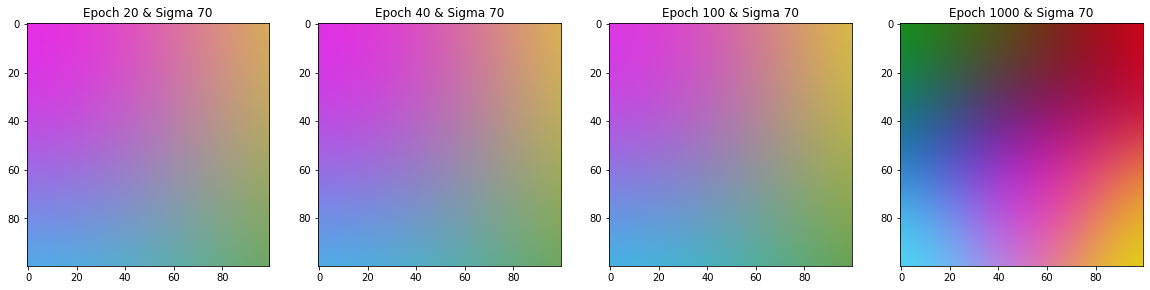

In [86]:
#initial learning rate alpha_0
lr=0.8
#initializing the sigma values
sigma_list = [ 1, 10, 30, 50, 70]
for p in sigma_list:
    plt.title("Initial color grid")
    plt.imshow(weights_initial)
    #calling the som model
    model=som(X,weights,lr,p)
    model.train()

### ANALYSIS

I have generated the plots for the initial weight matrix and have run the model for different values of sigma ranging 1,10,30,50,70 and generated the subplots to show the smoothening of the color grid at different epochs.The specific epoch points considered are : 20,40,100,100

#### Effect of number of Epochs
During the first epoch we will have the initial weight matrix and on each epoch we will be considering the 24 input vectors and for each of them we will be computing the winning neuron and update the weight of the neighbourhood neurons as well.So at the end of each epoch the learning rate as well as the radius will keep on decreasing which affects the neighbourhood function Nij.As the number of epochs increases the colors starts to blend in and gets stronger and smoother,giving us the desired result.The total number of epochs we are considering is 1000.

#### Effect of different values of sigma

When the value of initial radius sigma is small the neighbourhood will be correspondingly small and as the sigma chosen increases the neighbourhood region becomes bigger.So for the value of sigma=1 Nij is small and as the number of epochs on which it is trained increases,the decay radius becomes so small that only those points that are near to the winning neuron will be updated.This is the reason why we get solid dots as the end result in the color grid.Now as the value of sigma considered increases the neighbourhood region expands and hence more neuron's weight will be updated.So at sigma = 10 we get hexagonal color grids and at sigma values of 50 and 70 we get a more blended and stronger color grid for the input vector given.